In [95]:
import numpy as np
import pandas as pd

In [96]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

# list of possible encodings to try
file_path = r'C:\Users\DEVI PRASAD\OneDrive\Desktop\SPAM PROJECT\spam.csv'

for encoding in encodings:
  try:
    df = pd.read_csv(file_path, encoding=encoding)
    print(f"File successfully read with encoding:{encoding}")
    break #stop if success
  except UnicodeDecodeError:
    print(f"Failed to read with encoding: {encoding}")
    continue #try next encoding

#if loop completes without success, df will not be defined
if 'df' in locals():
  print("CV file has been successfully loaded.")
else:
  print("All encoding attempts failed, unable to read the csv file.")


Failed to read with encoding: utf-8
File successfully read with encoding:latin1
CV file has been successfully loaded.


In [97]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1033,ham,"OH MR SHEFFIELD! You wanna play THAT game, oka...",NaN,NaN,NaN
771,ham,Lol! U drunkard! Just doing my hair at d momen...,NaN,NaN,NaN
3075,ham,"Mum, hope you are having a great day. Hoping t...",NaN,NaN,NaN
2211,ham,Just gettin a bit arty with my collages at the...,NaN,NaN,NaN
3538,ham,What happen dear. Why you silent. I am tensed,NaN,NaN,NaN


In [98]:
df.shape

(5572, 5)

**1. data cleaning**

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [100]:
#drop last three columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [101]:
df.sample(5)

,v1,v2
2088,spam,Well done ENGLAND! Get the official poly ringt...
3025,ham,I finished my lunch already. U wake up already?
3294,ham,Dunno lei Ì_ all decide lor. How abt leona? Oo...
572,ham,Can you open the door?
4069,ham,Ok i wont call or disturb any one. I know all ...


In [102]:
#renaming the columns
df.rename(columns = {'v1':'target', 'v2': 'text'},inplace = True)
df.sample(5)

,target,text
63,ham,"Sorry my roommates took forever, it ok if I co..."
1099,ham,Been up to ne thing interesting. Did you have ...
4399,ham,Juz go google n search 4 qet...
5364,spam,Call 09095350301 and send our girls into eroti...
1662,spam,Hi if ur lookin 4 saucy daytime fun wiv busty ...


In [103]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [104]:
df['target'] = encoder.fit_transform(df['target'])

In [105]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [107]:
#check for duplicate values
df.duplicated().sum()

403

In [108]:
#removing duplicates
df = df.drop_duplicates(keep = 'first')

In [109]:
df.duplicated().sum()

0

In [110]:
df.shape

(5169, 2)

**eda**

In [111]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [112]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

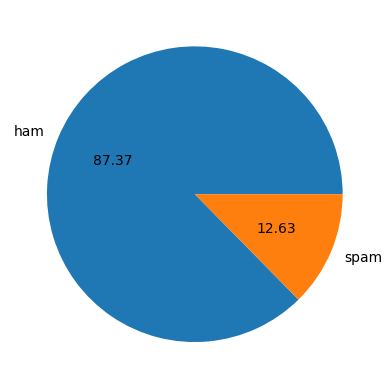

In [113]:
import matplotlib.pyplot as plt

labels = ['ham', 'spam']
plt.pie(df['target'].value_counts(), labels=labels, autopct="%0.2f")
plt.show()


In [114]:
#big chunk of ham and very less spam so out data is not balanced
import nltk

In [29]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\DEVI
[nltk_data]     PRASAD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [115]:
df['num_characters'] = df['text'].apply(len) #no.of char

In [116]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [117]:
#no.of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count

In [118]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [119]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #sentence

In [120]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [121]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [122]:
# targeting ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [123]:
# targeting spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

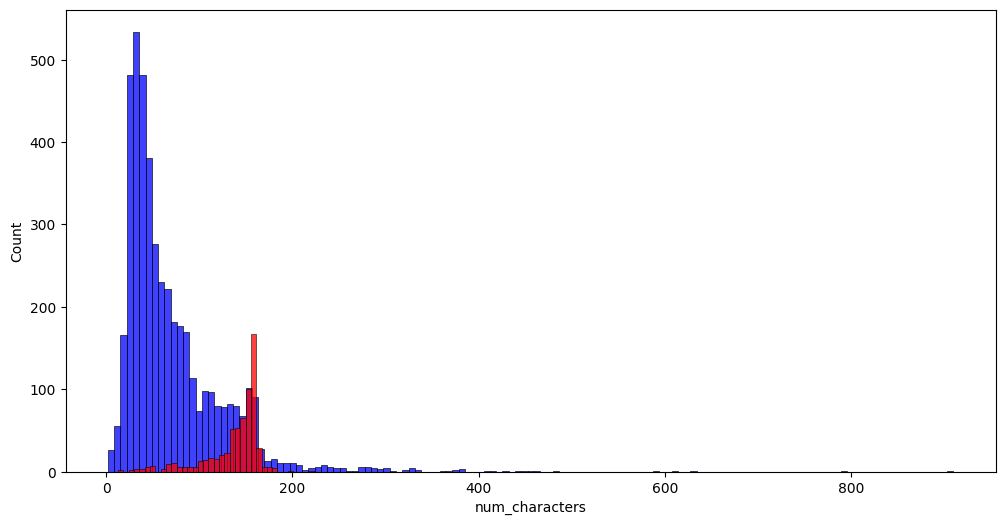

In [124]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data=df[df['target']==0], x='num_characters', color='blue') # for ham in character count
sns.histplot(data=df[df['target']==1], x='num_characters', color='red') # for spam in character count

<Axes: xlabel='num_words', ylabel='Count'>

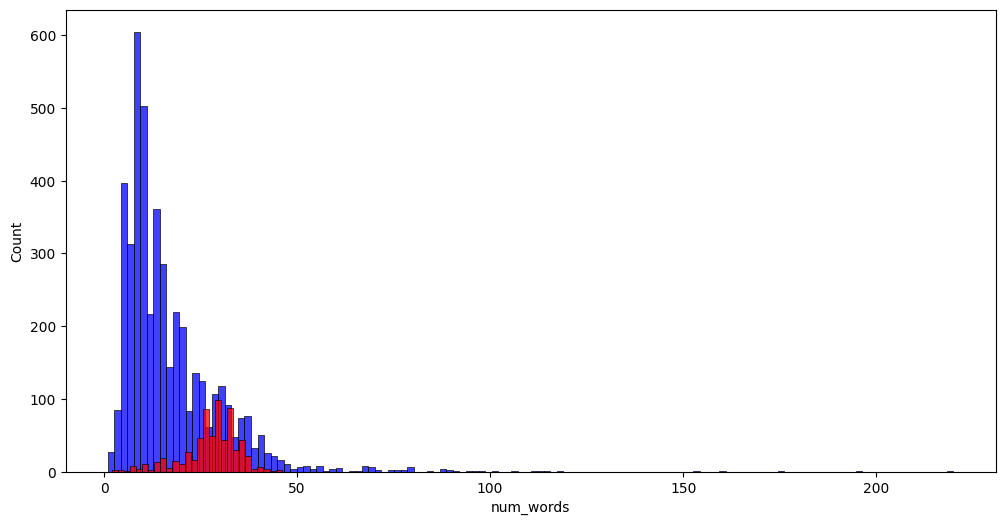

In [125]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data=df[df['target']==0], x='num_words', color='blue') # for hams in word count
sns.histplot(data=df[df['target']==1], x='num_words', color='red') # for spams in word count

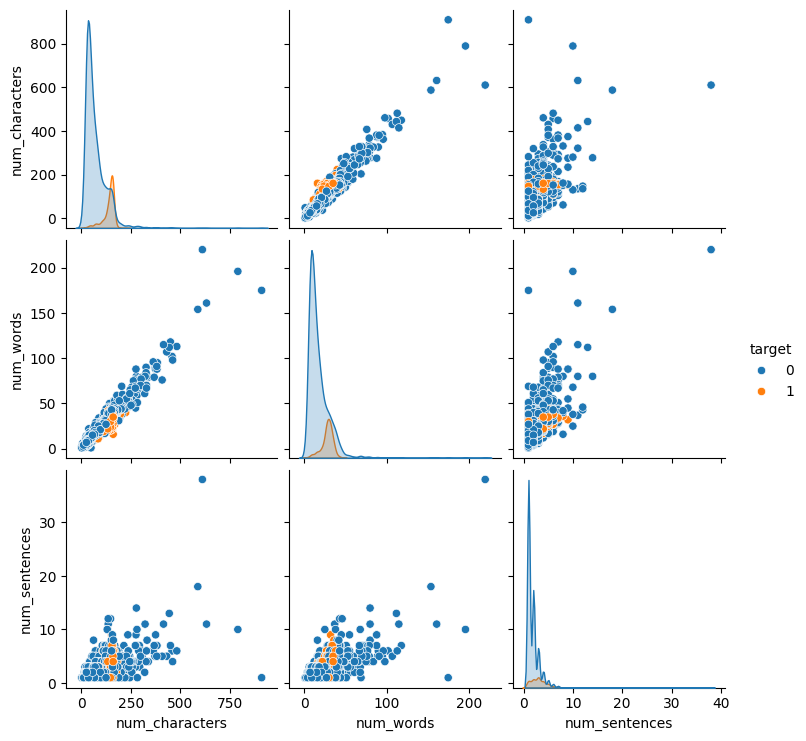

In [126]:
sns.pairplot(df,hue = 'target')

In [45]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

**Data Preprocessing**


In [46]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

# this block of code will simplify the complicated sentence, for example running will be converted to the run, and drawing is converted to draw ...this is called STEMMING
def transform_text(text):
  text = text.lower()
  text = word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i dont want to talk about this stuff anymore tonight,k? I've cried a lot about that thing u did it....")

print(transformed_text)

gon na home soon dont want talk stuff anymor tonight k cri lot thing u


[nltk_data] Downloading package stopwords to C:\Users\DEVI
[nltk_data]     PRASAD\AppData\Roaming\nltk_data...

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [128]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('lovingg')

'lovingg'

In [129]:
df['transformed_text'] = df['text'].apply(transform_text) # adding the transformed text as a sixth column which is done by stemming

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

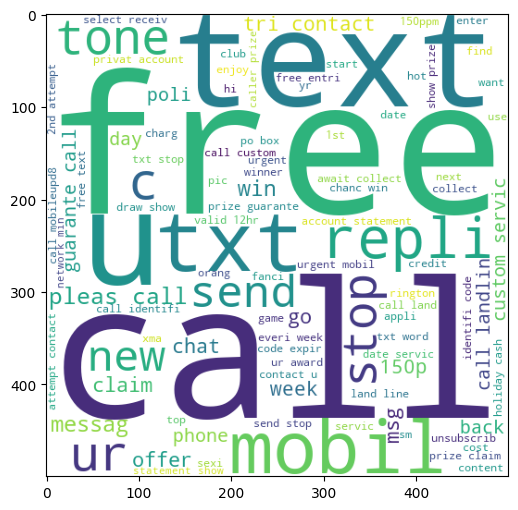

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

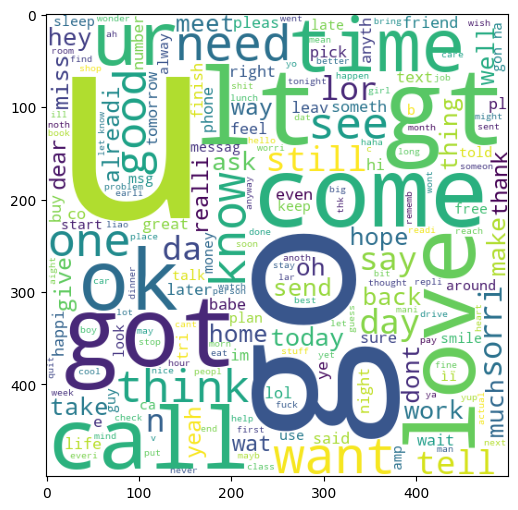

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

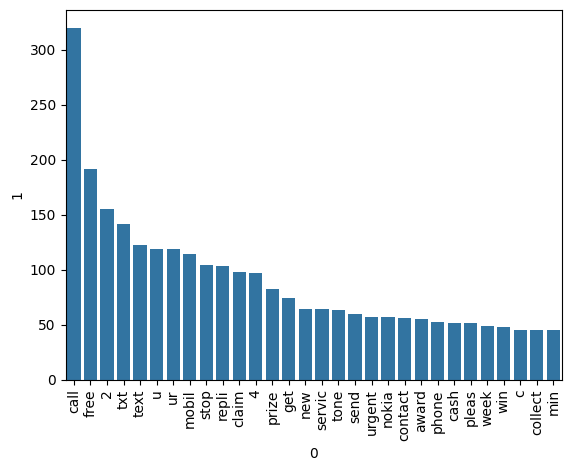

In [60]:
from collections import Counter
from seaborn import barplot

# Create a dataframe with the word counts
df_word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Plot the bar chart
barplot(x=df_word_counts[0], y=df_word_counts[1])

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [61]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35404

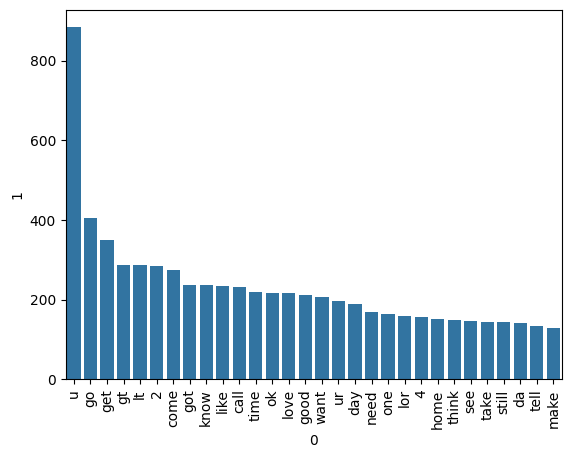

In [63]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Count the words in the ham_corpus
ham_word_counts = Counter(ham_corpus)

# Create a dataframe with the word counts
df_ham_word_counts = pd.DataFrame(ham_word_counts.most_common(30))

# Plot the bar chart
sns.barplot(x=df_ham_word_counts[0], y=df_ham_word_counts[1])

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [64]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**4.building the model**

In [65]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
thidf = TfidfVectorizer(max_features=3000)


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
X = thidf.fit_transform(df['transformed_text']).toarray()

In [67]:
X.shape

(5169, 3000)

In [68]:
y=df['target'].values

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score


In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [73]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [74]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [75]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [76]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 245.8 kB/s eta 0:08:29
   ---------------------------------------- 0.0/124.9 MB 245.8 kB/s eta 0:08:29
   ---------------------------------------- 0.1/124.9 MB 403.5 kB/s eta 0:05:10
   ---------------------------------------- 0.1/124.9 MB 403.5 kB/s eta 0:05:10
   ---------------------------------------- 0.1/124.9 MB 403.5 kB/s eta 0:05:10
   ---------------------------------------- 0.1/124.9 MB 403.5 kB/s eta 0:05:10
   ---------------------------------------- 0.1/124.9 MB 327.9 kB/s eta 0:06:21
   ---------------------------------------- 0.2/124.9 MB 509.6 kB/s eta 0:04:05
   ---------------------------------------- 0.2/124.9 MB 509.6 kB/s eta 0:04:05
   ---------------------------------------- 0.2/124.9 MB 509.6 kB/s

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc=SVC (kernel='sigmoid', gamma=1.0, C=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [79]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [80]:
def train_classifier(clf,X_train,y_train, X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy, precision

In [81]:
svc=SVC (kernel='sigmoid', gamma=1.0,C=1.0)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [82]:
svc=SVC (kernel='sigmoid', gamma=1.0, C=1.0)
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision=train_classifier(clf, X_train,y_train,X_test,y_test)
  print("For", name)
  print("Accuracy-", current_accuracy)
  print("Precision-",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy- 0.9758220502901354
Precision- 0.9747899159663865
For KN
Accuracy- 0.9052224371373307
Precision- 1.0
For NB
Accuracy- 0.9709864603481625
Precision- 1.0
For DT
Accuracy- 0.9294003868471954
Precision- 0.8282828282828283
For LR
Accuracy- 0.9584139264990329
Precision- 0.9702970297029703
For RF
Accuracy- 0.9758220502901354
Precision- 0.9829059829059829


c:\Users\DEVI PRASAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy- 0.960348162475822
Precision- 0.9292035398230089
For BgC
Accuracy- 0.9584139264990329
Precision- 0.8682170542635659
For ETC
Accuracy- 0.9748549323017408
Precision- 0.9745762711864406
For GBDT
Accuracy- 0.9468085106382979
Precision- 0.9191919191919192
For xgb
Accuracy- 0.9671179883945842
Precision- 0.9262295081967213


In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Accuracy', ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
5,RF,0.975822,0.982906
8,ETC,0.974855,0.974576
2,NB,0.970986,1.000000
10,xgb,0.967118,0.926230
6,AdaBoost,0.960348,0.929204
4,LR,0.958414,0.970297
7,BgC,0.958414,0.868217
9,GBDT,0.946809,0.919192
3,DT,0.929400,0.828283


In [85]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [86]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,RF,Accuracy,0.975822
2,ETC,Accuracy,0.974855
3,NB,Accuracy,0.970986
4,xgb,Accuracy,0.967118
5,AdaBoost,Accuracy,0.960348
6,LR,Accuracy,0.958414
7,BgC,Accuracy,0.958414
8,GBDT,Accuracy,0.946809
9,DT,Accuracy,0.929400


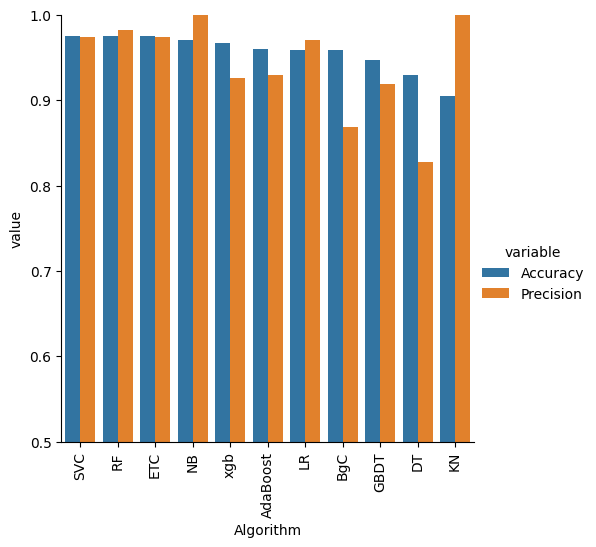

In [87]:
sns.catplot(x= 'Algorithm', y='value',hue='variable', data=performance_df1, kind='bar', height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
import pandas as pd

#model improve
# 1. change the max_features parameter of thidf

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values(by='Algorithm')


In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')

In [90]:
# Assuming 'clfs', 'accuracy_scores', and 'precision_scores' are defined elsewhere

temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
}).sort_values(by='Algorithm')

In [91]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
4,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
7,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283


In [92]:
# Change the misspelled 'gama' parameter to 'gamma'
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)

# Continue with the rest of the code
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# ...

In [93]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [94]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827
